# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [34]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [35]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [36]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [37]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scales for the 2 predictors are different.

#### Question 4. Drop data points with missing data


In [38]:
df = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [39]:
df.isnull().values.any()

False

Answer: By using df.isnull().values.any() which returned false confirming no null/na values are in df.

#### Question 6. Create box plots for GRE and GPA

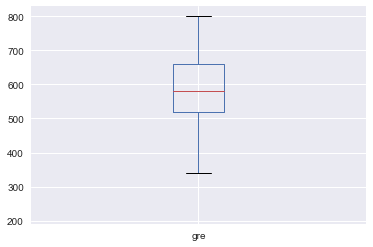

In [40]:
df['gre'].plot(kind='box')
plt.show()

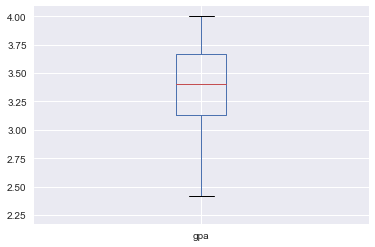

In [41]:
df['gpa'].plot(kind='box')
plt.show()

#### Question 7. What do this plots show?

Answer: They show the 25%, 50% and 75% percentile ranges together with the Minimum and Maximum values with the whiskers. The dots are determined to be outliners and excluded to avoid skewing the boxplot.

#### Question 8. Describe each distribution 

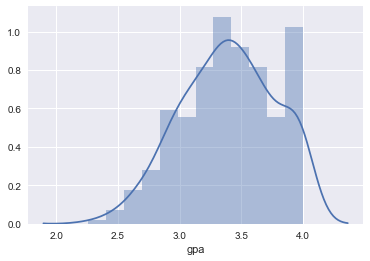

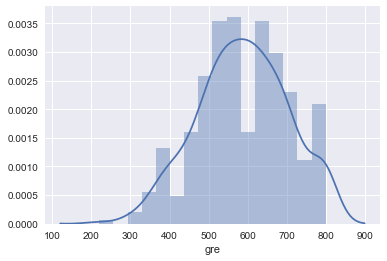

In [42]:
# plot the distribution of each variable 
import seaborn as sns
sns.distplot(df['gpa'])
sns.plt.show()

sns.distplot(df['gre'])
sns.plt.show()

#Both variables are close to being normal but both are positively skewed and have an extra hump on the positive end.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, as the distribution does not have the bell curve expected of normal distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we could try to log the gre and gpa values to see if it will smoothen the bump at the positive end and also try to bring the distribution back to the centre and correct the positive skew

In [43]:
df['log_gpa'] = np.log1p(df['gpa'])
df['log_gre'] = np.log1p(df['gre'])

df.head()

C:\Users\desmo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\desmo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,admit,gre,gpa,prestige,log_gpa,log_gre
0,0,380.0,3.61,3.0,1.528228,5.942799
1,1,660.0,3.67,3.0,1.541159,6.493754
2,1,800.0,4.00,1.0,1.609438,6.685861
3,1,640.0,3.19,4.0,1.432701,6.463029
4,0,520.0,2.93,4.0,1.368639,6.255750


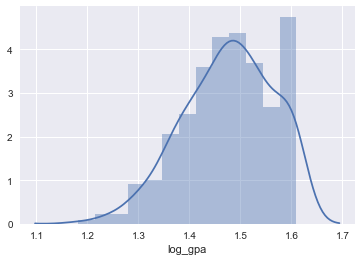

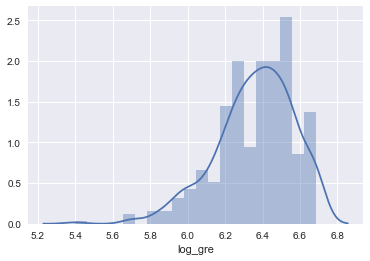

In [44]:
sns.distplot(df['log_gpa'])
sns.plt.show()

sns.distplot(df['log_gre'])
sns.plt.show()


#### Question 11. Which of our variables are potentially colinear? 

In [45]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige,log_gpa,log_gre
admit,1.000000,0.181202,0.174116,-0.243563,0.171524,0.179574
gre,0.181202,1.000000,0.382408,-0.124533,0.380256,0.989222
gpa,0.174116,0.382408,1.000000,-0.060976,0.998575,0.383112
prestige,-0.243563,-0.124533,-0.060976,1.000000,-0.059287,-0.124077
log_gpa,0.171524,0.380256,0.998575,-0.059287,1.000000,0.381560
log_gre,0.179574,0.989222,0.383112,-0.124077,0.381560,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are potentially colinear but with a correlation of ~0.38, the correlation is not very strong

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We could try to use Point-Biserial Correlation

#### Question 14. What is your hypothesis? 

Answer: 

Null hypothesis: There is no relationship between grad school admissions rates and prestige of undergraduate schools

Alternate hypothesis: There is a relationship between grad school admissions rates and prestige of undergraduate schools

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: We could attempt to fill in the missing data via interpolation.

#### 2. Bonus: Log transform the skewed data

In [46]:
df['log_gpa'] = np.log1p(df['gpa'])
df['log_gre'] = np.log1p(df['gre'])

C:\Users\desmo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\desmo\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### 3. Advanced: Impute missing data

In [47]:
df_impute = df_raw.interpolate(method='values')

df_impute.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [48]:
df_impute.isnull().values.any()
#Confirmed df_impute has no missing data

False